In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\sathish kumar\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\sathish kumar\Downloads\test.csv")

In [3]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [7]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

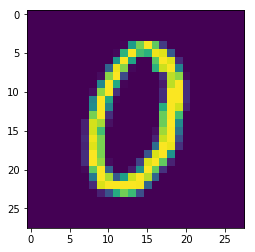

In [8]:
print_image(5, df_x)

In [9]:
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

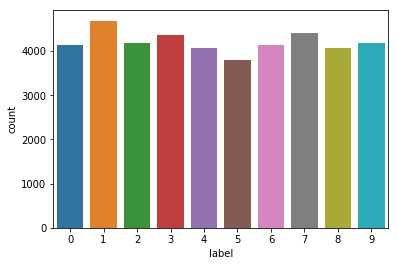

In [10]:
sns.countplot(df_y)

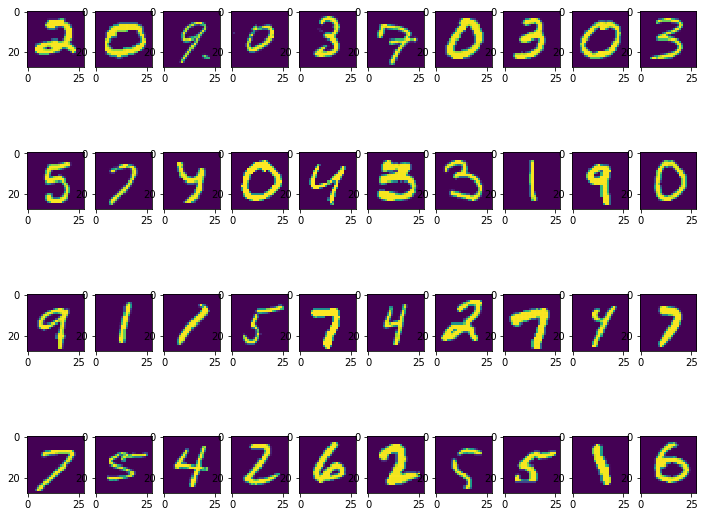

In [11]:
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, test)

In [12]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [13]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
y_pred=rf.predict(X_test)
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=rf.score(X_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.964
Accuracy on the training subset: 1.000


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
16275,3,3
19204,6,6
18518,9,9
25780,5,5
16228,6,6


In [17]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[795   0   0   1   2   1   6   0   8   0]
 [  0 946   6   2   1   2   2   0   2   0]
 [  4   0 840   5   1   0   2   4   4   0]
 [  2   0  11 818   0  10   1   6  10   5]
 [  1   2   0   0 797   0   3   1   2  21]
 [  2   1   0   8   0 731   7   2   5   0]
 [  2   1   0   0   2   6 827   0   3   0]
 [  2   3  12   2   6   0   0 862   1  11]
 [  1   3   3  16   4   8   4   0 722   7]
 [  9   3   1  10  13   3   0  10   5 758]]


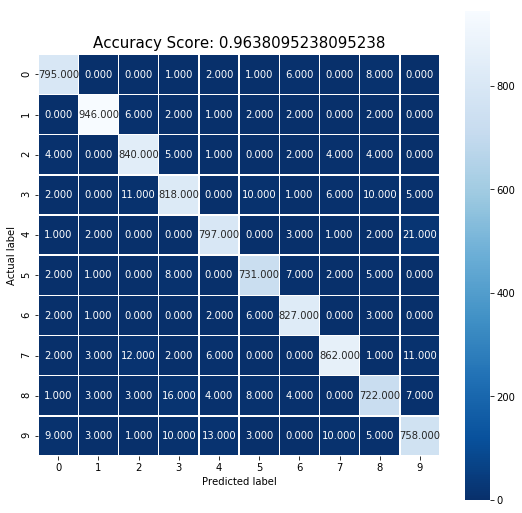

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [19]:
print("Classification Report")
clr=classification_report(y_test, y_pred, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.99      0.98      0.99       961
          0       0.97      0.98      0.97       813

avg / total       0.98      0.98      0.98      1774

